In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets to create a comprehensive table
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Feature engineering: Create customer-specific features
customer_summary = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',               # Total spend
    'ProductID': lambda x: x.nunique(), # Unique products purchased
    'TransactionDate': 'count'          # Total number of transactions
}).rename(columns={
    'TotalValue': 'TotalSpend',
    'ProductID': 'UniqueProducts',
    'TransactionDate': 'TransactionCount'
}).reset_index()

# Display the processed data
print(customer_summary.head())


  CustomerID  TotalSpend  UniqueProducts  TransactionCount
0      C0001     3354.52               5                 5
1      C0002     1862.74               4                 4
2      C0003     2725.38               4                 4
3      C0004     5354.88               8                 8
4      C0005     2034.24               3                 3


In [4]:
# Scale the numerical features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_summary[['TotalSpend', 'UniqueProducts', 'TransactionCount']])

# Convert to DataFrame for convenience
scaled_data = pd.DataFrame(scaled_features, columns=['TotalSpend', 'UniqueProducts', 'TransactionCount'])
scaled_data['CustomerID'] = customer_summary['CustomerID']

# Display scaled data
print(scaled_data.head())


   TotalSpend  UniqueProducts  TransactionCount CustomerID
0   -0.061701        0.050047         -0.011458      C0001
1   -0.877744       -0.424204         -0.467494      C0002
2   -0.405857       -0.424204         -0.467494      C0003
3    1.032547        1.472798          1.356650      C0004
4   -0.783929       -0.898455         -0.923530      C0005


In [5]:
# Choose the number of clusters (e.g., between 2 and 10)
n_clusters = 5

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
customer_summary['Cluster'] = clusters

# Display cluster assignments
print(customer_summary[['CustomerID', 'Cluster']].head())


E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  CustomerID  Cluster
0      C0001        3
1      C0002        0
2      C0003        0
3      C0004        2
4      C0005        0


In [6]:
# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.8465954546153733


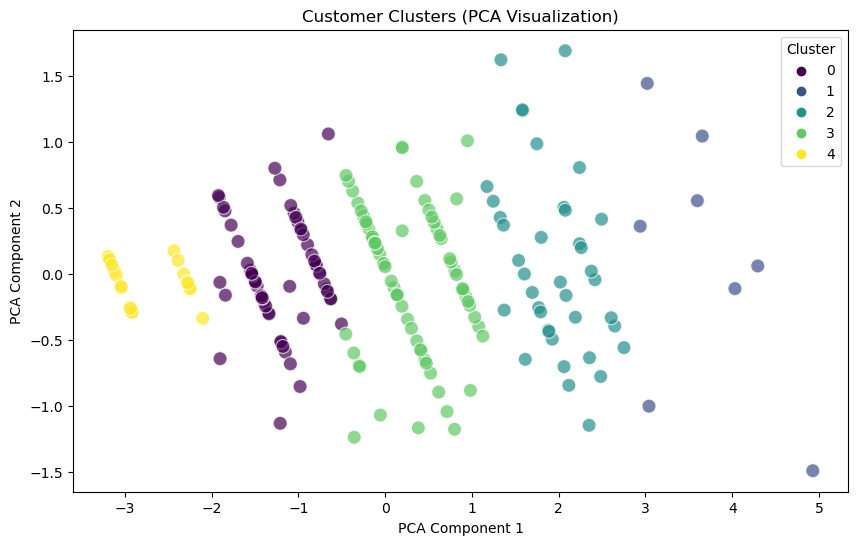

In [7]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to the customer summary
customer_summary['PCA1'] = pca_result[:, 0]
customer_summary['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', 
    hue='Cluster', 
    data=customer_summary, 
    palette='viridis', 
    s=100, alpha=0.7
)
plt.title('Customer Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()
